In [0]:
import pandas
import numpy as np
import seaborn as sns
data1 = pandas.read_excel('ds.xlsx', sheet_name='Margin')
data2 = pandas.read_excel('ds.xlsx', sheet_name='Gross')
data3 = pandas.read_excel('ds.xlsx', sheet_name='Heatmap')

data2["Bread"] = data2["Bread"].astype(float)

In [0]:
data1

,Margin,Bread,Beer,Milk,Sausage
0,0.05,30,32,40,25
1,0.10,24,20,40,20
2,0.15,21,19,36,18
3,0.20,20,15,30,17
4,0.30,10,15,28,10


In [0]:
data2

,Name,Bread,Beer,Milk,Sausage
0,Cost of one,75.0,200.0,220.0,140.0
1,Best margin,0.0,0.0,0.0,0.0
2,Gross profit,0.0,0.0,0.0,0.0
3,Total,0.0,NaN,NaN,NaN


In [0]:
list = data1['Margin']
items = data1.columns[1:]

In [0]:
#list of GrossPrice
grossMargin = []

#list of best margine
bestMargin = []

In [0]:
for item in items:
  i = 0
  maxT = 0
  for percent in list:
    #calculate GrossProfit
    costWithoutPerc = data1[item][i] * data2[item][0]
    cost = data2[item][0] * data1[item][i] #own cost product
    temp = (costWithoutPerc * percent) + costWithoutPerc - cost
    
    if (temp > maxT): 
      maxT = temp
      margine = percent
    print(maxT)
    i += 1
    if (i == len(list)):
      grossMargin.append(maxT)
      bestMargin.append(margine)
      print(item)
      print(maxT)
      print("---------------------------")

112.5
180.0
236.25
300.0
300.0
Bread
300.0
---------------------------
320.0
400.0
570.0
600.0
900.0
Beer
900.0
---------------------------
440.0
880.0
1188.0
1320.0
1848.0
Milk
1848.0
---------------------------
175.0
280.0
378.0
476.0
476.0
Sausage
476.0
---------------------------


In [0]:
i = 0
for item in items:
  data2[item][1] = bestMargin[i]
  data2[item][2] = grossMargin[i]
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
data2

,Name,Bread,Beer,Milk,Sausage
0,Cost of one,75.0,200.0,220.0,140.0
1,Best margin,0.2,0.3,0.3,0.2
2,Gross profit,300.0,900.0,1848.0,476.0
3,Total,0.0,NaN,NaN,NaN


**Building probability for each product**

In [0]:
data3.head(4)

,# of Check,Main Product,Product Group,Margin,Number of goods,Cost of Goods
0,711,Alcohol,Drinks,0.05,3,500
1,711,Beauty,Household goods,0.05,2,1000
2,711,Bread,Bakery,0.05,2,70
3,711,Cleaning,Household goods,0.05,3,1000


In [0]:
table = pandas.pivot_table(data3, values='Number of goods', index=['# of Check'], columns=['Main Product'], aggfunc=np.sum)

In [0]:
table.head(4)

Main Product,Alcohol,Animals food,Beauty,Bread,Cleaning,Cookies and sweets,Frozen,Gastronomy,Grocery,Hygiene,Kids,Milky,Soft Drinks,Sweets,Tobacco
# of Check,,,,,,,,,,,,,,,
711,3.0,NaN,2.0,2.0,3.0,2.0,2.0,2.0,6.0,3.0,7.0,2.0,5.0,9.0,NaN
712,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
713,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,9.0,NaN,NaN,3.0,NaN,NaN,NaN
714,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
prods = table.columns

In [0]:
for col in range(table.shape[0]): 
  for row in range(table.shape[1]):
    if (table.values[col][row] > 0):
      table.values[col][row] = 1
    else:
      table.values[col][row] = 0

In [0]:
newTable = table.corr(method = 'kendall')
for col in range(newTable.shape[0]):
  for row in range(newTable.shape[1]):
    newTable.values[col][row] = 0

In [0]:
col = 0
for pr1 in prods:
  row = 0
  for pr2 in prods:
    #if((row-col) >= 1):
    #  newTable.values[col][row] = 0
    #else:
    newTable.values[col][row] = (table[pr1].sum()/table.shape[0]) * ((table[pr1]*table[pr2]).sum()/(table[pr1].sum()))
    newTable.values[col][row]*=100
    row+=1
  col+=1

In [0]:
col = 0
for pr1 in prods:
  row = 0
  t = table[pr1].values
  for pr2 in prods:
    t = t*table[pr2]
    row+=1
  if(row==col):
    newTable.values[col][row] = t.sum()/table[pr1].sum()
  col+=1

In [0]:
table['Alcohol'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
t

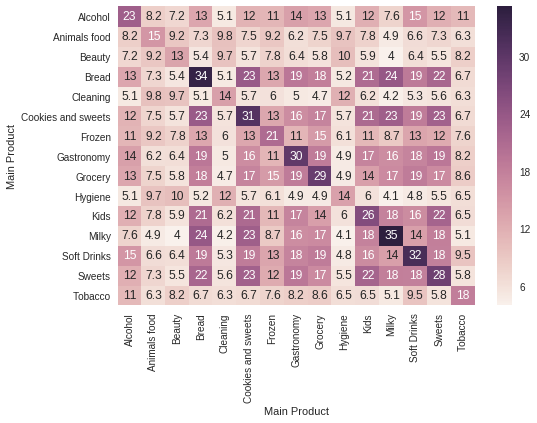

In [0]:
sns.heatmap(newTable, annot = True)

In [0]:
col = 0
for pr1 in prods:
  row = 0
  for pr2 in prods:
    newTable.values[col][row] = (table[pr1] * table[pr2]).sum()
    row+=1
  col+=1

In [0]:
col = 0
for pr1 in prods:
  row = 0
  t = table[pr1]
  for pr2 in prods:
    t*=table[pr2]
    row+=1
  if(row==col):
    newTable.values[col][row] = t.sum()
  col+=1

In [0]:
newTable

Main Product,Alcohol,Animals food,Beauty,Bread,Cleaning,Cookies and sweets,Frozen,Gastronomy,Grocery,Hygiene,Kids,Milky,Soft Drinks,Sweets,Tobacco
Main Product,,,,,,,,,,,,,,,
Alcohol,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Animals food,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Beauty,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Bread,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Cleaning,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Cookies and sweets,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Frozen,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Gastronomy,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Grocery,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0


In [0]:
table['Alcohol']

# of Check
711     0.0
712     0.0
713     0.0
714     0.0
715     0.0
716     0.0
717     0.0
718     0.0
719     0.0
720     0.0
721     0.0
722     0.0
723     0.0
724     0.0
725     0.0
726     0.0
727     0.0
728     0.0
729     0.0
730     0.0
731     0.0
732     0.0
733     0.0
734     1.0
735     0.0
736     0.0
737     0.0
738     0.0
739     0.0
740     0.0
       ... 
3882    0.0
3883    0.0
3884    0.0
3885    0.0
3886    0.0
3887    0.0
3888    0.0
3889    0.0
3890    0.0
3891    0.0
3892    0.0
3893    0.0
3894    0.0
3895    0.0
3896    0.0
3897    0.0
3898    0.0
3899    0.0
3900    0.0
3901    0.0
3902    0.0
3903    0.0
3904    0.0
3905    0.0
3906    0.0
3907    0.0
3908    0.0
3909    0.0
3910    0.0
3911    0.0
Name: Alcohol, Length: 3201, dtype: float64

In [0]:
import scipy
from scipy.stats import pearsonr

In [0]:
table1 = table.corr(method = 'kendall')
table1

Main Product,Alcohol,Animals food,Beauty,Bread,Cleaning,Cookies and sweets,Frozen,Gastronomy,Grocery,Hygiene,Kids,Milky,Soft Drinks,Sweets,Tobacco
Main Product,,,,,,,,,,,,,,,
Alcohol,1.000000,0.319321,0.287725,0.267596,0.129988,0.236606,0.371851,0.375432,0.341899,0.139264,0.327499,-0.022521,0.397533,0.293797,0.415905
Animals food,0.319321,1.000000,0.588826,0.128554,0.627845,0.174380,0.416522,0.107688,0.197841,0.622945,0.252988,-0.021083,0.109413,0.193293,0.257111
Beauty,0.287725,0.588826,1.000000,0.048198,0.657942,0.100690,0.361222,0.155066,0.121748,0.716428,0.158881,-0.047169,0.128850,0.107701,0.438659
Bread,0.267596,0.128554,0.048198,1.000000,0.018743,0.591268,0.298024,0.416526,0.388164,0.033706,0.583934,0.526958,0.358054,0.565987,0.026311
Cleaning,0.129988,0.627845,0.657942,0.018743,1.000000,0.090203,0.218328,0.057132,0.043729,0.837305,0.167118,-0.039460,0.053932,0.105670,0.281265
Cookies and sweets,0.236606,0.174380,0.100690,0.591268,0.090203,1.000000,0.341644,0.343705,0.406910,0.091819,0.646536,0.539586,0.400753,0.666496,0.056428
Frozen,0.371851,0.416522,0.361222,0.298024,0.218328,0.341644,1.000000,0.276159,0.460216,0.230439,0.309515,0.070664,0.344814,0.352819,0.241036
Gastronomy,0.375432,0.107688,0.155066,0.416526,0.057132,0.343705,0.276159,1.000000,0.484041,0.054321,0.488340,0.271577,0.380893,0.520518,0.158902
Grocery,0.341899,0.197841,0.121748,0.388164,0.043729,0.406910,0.460216,0.484041,1.000000,0.060731,0.327822,0.294718,0.438219,0.408222,0.186777


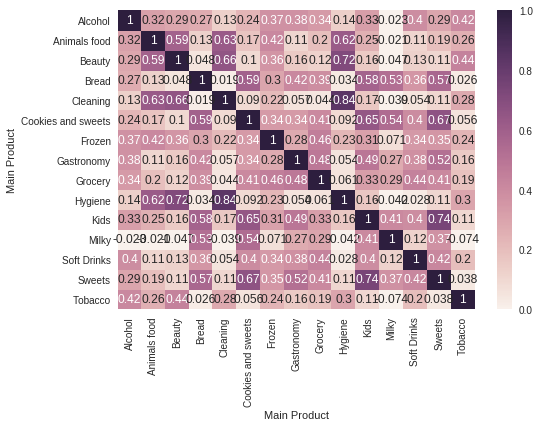

In [0]:
mask = np.zeros_like(table1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(table1, annot=True, vmin=0, vmax=1)

In [0]:
table2 = table1

In [0]:
for i in range(15):
  for y in range(15):
    pow(table2.values[i][y], 2)
    

In [0]:
pow(table2.values[0][14], 2)

0.0005667639554899299

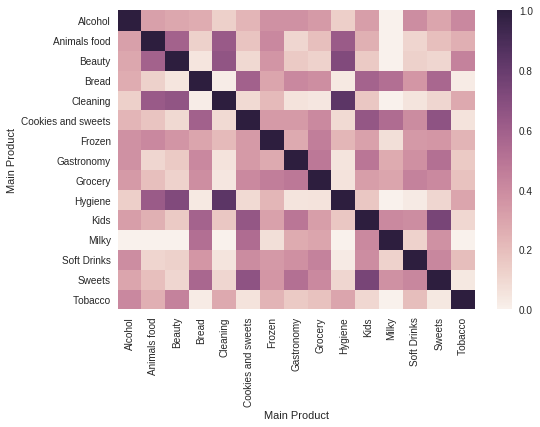

In [0]:
sns.heatmap(table2, vmin=0, vmax=1)

In [0]:
import pandas
dataTe = pandas.read_excel('Book1.xlsx')

In [0]:
dataTe

,N of check,Main Product,Product Group,Margin,Number of goods,Cost of Goods
0,711,Alcohol,Drinks,0.05,3,500
1,711,Beauty,Household goods,0.05,2,1000
2,711,Bread,Bakery,0.05,2,70
3,711,Cleaning,Household goods,0.05,3,1000
4,711,Cookies and sweets,Bakery,0.05,2,80
5,712,Alcohol,Drinks,0.05,0,500
6,712,Beauty,Household goods,0.05,2,1000
7,712,Bread,Bakery,0.05,3,70
8,712,Cleaning,Household goods,0.05,6,1000
9,712,Cookies and sweets,Bakery,0.05,0,80


In [0]:
tableTe = pandas.pivot_table(dataTe, values='Number of goods', index=['N of check'], columns=['Main Product'], aggfunc=np.sum)
tableTe

Main Product,Alcohol,Beauty,Bread,Cleaning,Cookies and sweets
N of check,,,,,
711,3,2,2,3,2
712,0,2,3,6,0
713,0,2,1,0,0


In [0]:
tableTe['Cookies and sweets'].values

array([1, 0, 0])

In [0]:
x=0
for i in tableTe['Cookies and sweets'].values:
  if (i>0):
    tableTe['Cookies and sweets'].values[x] = 1
  x+=1

In [0]:
tt = tableTe.corr(method = 'kendall')

In [0]:
tableTe

Main Product,Alcohol,Beauty,Bread,Cleaning,Cookies and sweets
N of check,,,,,
711,1,1,1,1,1
712,0,1,1,1,0
713,0,1,1,0,0


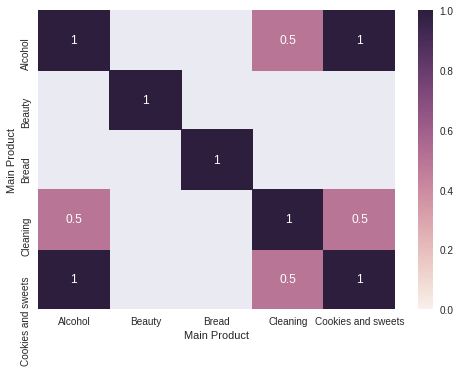

In [0]:
sns.heatmap(tt, annot = True, vmin = 0, vmax=1)

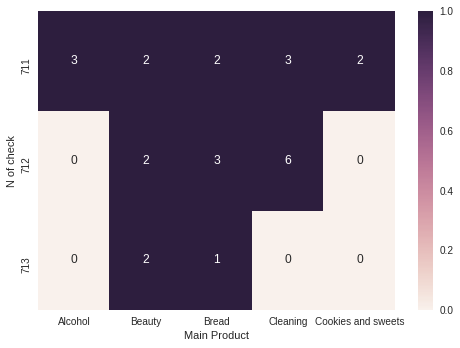

In [0]:
mask = np.zeros_like(tableTe)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(tableTe, annot=True, vmin=0, vmax=1)

In [0]:
tableTe.corr(method = 'spearman', min_periods = 0)

Main Product,Alcohol,Beauty,Bread,Cleaning,Cookies and sweets
Main Product,,,,,
Alcohol,1.0,NaN,0.0,0.0,1.0
Beauty,NaN,NaN,NaN,NaN,NaN
Bread,0.0,NaN,1.0,1.0,0.0
Cleaning,0.0,NaN,1.0,1.0,0.0
Cookies and sweets,1.0,NaN,0.0,0.0,1.0


In [0]:
np.corrcoef(tableTe)

array([[ 1.        ,  0.29329423, -0.61237244],
       [ 0.29329423,  1.        ,  0.04490133],
       [-0.61237244,  0.04490133,  1.        ]])

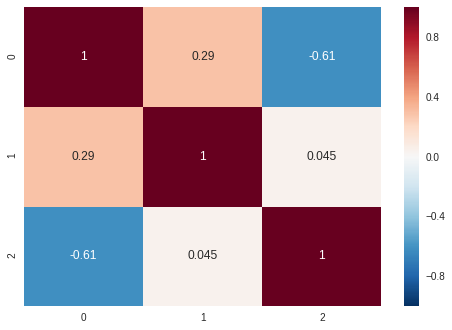

In [0]:
sns.heatmap(np.corrcoef(tableTe), annot=True)